In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255  
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = datagen.flow_from_directory(
    'C:/Users/SUMIT MITRA/Final Year Project/cancer/train',
    target_size=(224, 224), 
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    'C:/Users/SUMIT MITRA/Final Year Project/cancer/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 4961 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(
    'C:/Users/SUMIT MITRA/Final Year Project/cancer/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1249 images belonging to 2 classes.


In [11]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_efficientnet_model.keras', save_best_only=True, monitor='val_loss')

In [19]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 128s 823ms/step - accuracy: 0.4904 - loss: 0.6999 - val_accuracy: 0.4000 - val_loss: 0.6973
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4375 - loss: 0.7134 - val_accuracy: 0.4000 - val_loss: 0.6994
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 128s 828ms/step - accuracy: 0.5028 - loss: 0.6961 - val_accuracy: 0.6000 - val_loss: 0.6925
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4062 - loss: 0.6992 - val_accuracy: 0.6000 - val_loss: 0.6922
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 126s 811ms/step - accuracy: 0.5027 - loss: 0.6940 - val_accuracy: 0.6000 - val_loss: 0.6837
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4375 - loss: 0.7000 - val_accuracy: 0.6000 - val_loss: 0.6835
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 125s 806ms/step - accuracy: 0.5090 - loss: 0.6928 - val_accuracy: 0.4000 - val_loss: 0.6974
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4375 - loss: 0.6961 - 

In [21]:
base_model.trainable = True
optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

fine_tune_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 643s 4s/step - accuracy: 0.5828 - loss: 0.6752 - val_accuracy: 0.6000 - val_loss: 0.6765
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7500 - loss: 0.5355 - val_accuracy: 0.6000 - val_loss: 0.6764
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 580s 4s/step - accuracy: 0.8309 - loss: 0.4531 - val_accuracy: 0.4000 - val_loss: 0.7374
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9062 - loss: 0.2738 - val_accuracy: 0.4000 - val_loss: 0.7198
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 585s 4s/step - accuracy: 0.9364 - loss: 0.2386 - val_accuracy: 0.9000 - val_loss: 0.5255
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9688 - loss: 0.1325 - val_accuracy: 0.8000 - val_loss: 0.5329
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 587s 4s/step - accuracy: 0.9676 - loss: 0.1338 - val_accuracy: 0.8000 - val_loss: 0.4879
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 1.0000 - loss: 0.0734 - val_accuracy

In [23]:
model.load_weights('best_efficientnet_model.keras')

In [25]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

39/39 ━━━━━━━━━━━━━━━━━━━━ 30s 775ms/step - accuracy: 0.9980 - loss: 0.0285
Test Accuracy: 99.76%


In [27]:
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 719ms/step


In [29]:
report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

      Cancer       1.00      1.00      1.00       629
      Normal       1.00      1.00      1.00       620

    accuracy                           1.00      1249
   macro avg       1.00      1.00      1.00      1249
weighted avg       1.00      1.00      1.00      1249



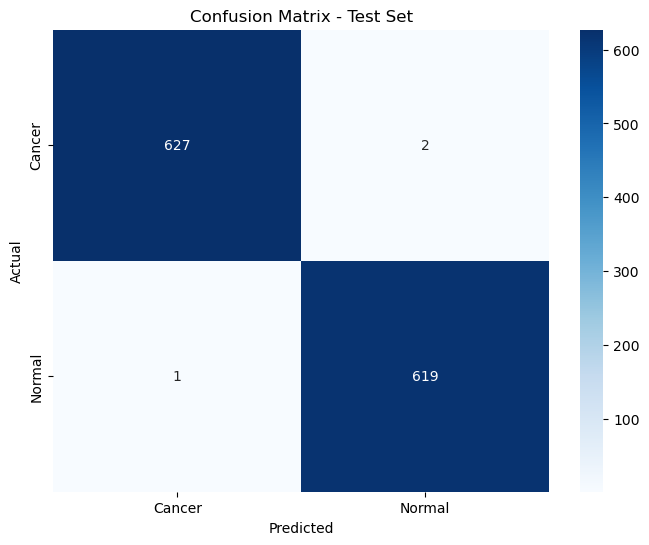

In [31]:
cm = confusion_matrix(true_classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [33]:
model.save('FinalQ_efficientnet_model.keras')